<a href="https://colab.research.google.com/github/mvdheram/Python-DS/blob/master/Object_Oriented_Programming_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programming paradigm** : 

> ***Approach*** of solving problem (programming) with ***style***.



Types:

1.   Procedural programming :

> Code as **sequence** of steps. 


2.   Object-oriented programming :


>  Code as interactions of **objects**.



3.   Functional Programming :


> Code as interaction of  **functions** that returns a value based on input.




## Object Oriented Programming

**Object** = **Encapsulation** ***( state + behaviour )***

**Class**  = **Blueprint** ( ***Object*** ) 

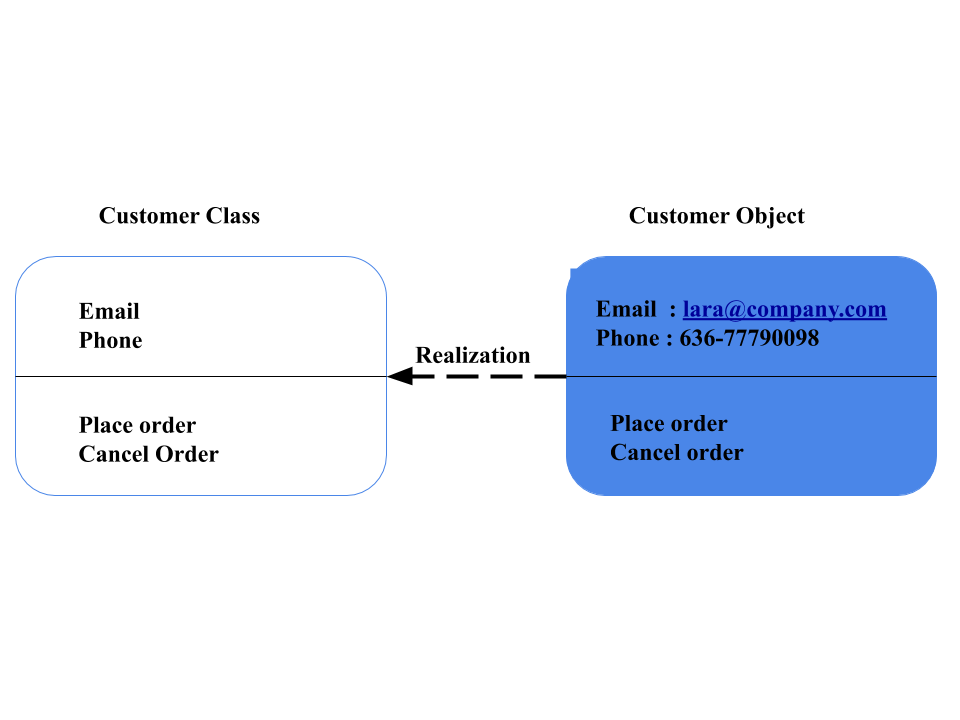

# OOP in Python


*   ***Everything*** in python is an ***Object***
*   Every Object associated with class


In [ ]:
import numpy as np
a = np.array([1,2,3,4])
print (type(a)) 

<class 'numpy.ndarray'>


In [ ]:
# Attribute -> state of an object = variabel 
a.shape 

(4,)

In [ ]:
# Method -> behaviour of an object = functions()
a.reshape(2,2)  

array([[1, 2],
       [3, 4]])

Lists all attributes and methods of the underlying class :  `dir(a)`


Reference/help of the class (ndarray) associated with object(a) :` help(a) `

## Class anatomy

In [ ]:
class Customer:

  def identify(self,name):
    print("I am Customer " + name)

`self` : 
*   Refers to the data of particular object.
*   Stand-in for particular object used in class definition.
*  Used to access attributes and call other methods within the class definition

```
cust = Customer()
cust.identify("Kotlin")
```
*Interpreted as*: ` Customer.identify(cust,"Kotlin")`









In [ ]:
# Bundling the state with methods operated on it (Encapsulation)
class Customer:

  def set_name(self, new_name):
    self.name = new_name # Create attribute by assigning a value
  
  # Using the .name from the object 
  def identify(self):
    print("I am Customer " + self.name) # pulls the name attribute from the called object


In [ ]:
cust = Customer()
cust.set_name("Kotlin") # Creats and sets the .name attribute to Kotlin
cust.identify()

I am Customer Kotlin


### Constructor

* Bundles all the attributes of class for construction.
* Constructor `_ _init_ _(self, name)` always called when an object is created.
* Default values (balance = 0) `_ _init_ _(self, name, balance = 0 )`  can be set.




**Best Practices:**


1.  Initialize attributes in `_ _init_ _(self)` 
2. Naming:

  > Class name: `CamelCase`

  > Methods, attributes: `lower_snake_case`
3. Use  ***docstrings*** to describe the class. Shown when *help* is called.
> ```
class MyClass:
  """ This class does ..."""
```



In [ ]:
# Bundling the state with methods operated on it (Encapsulation)
class Customer:

  def __init__(self, name, balance = 0): # constructor creates name and balance attributes
    self.name = name 
    self.balance = balance
 
  def identify(self):
    print("I am Customer " + self.name + " with balance " + str(self.balance))

In [ ]:
cust = Customer("Kotlin GO",1000)
cust.identify()

I am Customer Kotlin GO with balance 1000


### Instance-Level Data and Class level data

**Instance-level data:**

`_ _init_ _(self, name, balance = 0 )`
 
*name and balance* - ***instance attributes***

*self* - for binding to an instance.

**Class-Level data:**

Data shared among all instances of class and serves as ***gloabal variable***.

why?

**Global Constants related to class**

*   min/max values for attributes (MIN_SALARY =3000)
*   Commonly used values and constants e.g: `pi` for `circle` class

**Class methods:**

Method defined in class using `@classmethod` decorator and `cls` as first argument and called using `MyClass.my_method(args..)`

Why?

**Alternative constructor** for class, as class can have only one `__init__`.



In [ ]:
# Class-Level data and methods
class Employee:

  # Define class attribute
  MIN_SALARY = 30000 #<--- no self

  def __init__(self,name, salary):
    self.name = name

    if salary >= Employee.MIN_SALARY: # Use classname.attribute when refering class attributes
      self.salary = salary
    else:
      self.salary = Employee.MIN_SALARY
  
  @classmethod
  def from_file(cls,filename):   # Alternate constructor, cls as first argument
    with open(filename,"r") as f:
      name = f.readline()
    return cls(name)             # cls calls __init__ which returns an object

## Inheritence and Polymorphism

```
class BankAccount:
  def __init__(self,balance):
    self.balance = balance

  def withdraw(self,amount):
    self.balance -= amount

class SavingsAccount(BankAccount):

    # Constructor of sub class with additional parameters 
    def __init__(self,balance, interest_rate):

        # call parent constructor using ClassName.__init__()
        BankAccount.__init__(self,balance) # <-- self is Savings Account and Bank Account; Python -> instances of subclass are also instances of parent classes

        # Its own attributes
        self.interest_rate = interest_rate

    # New Functionality
    def compute_interest(self, n_periods = 1):
      return self.balance *((1+ self.interest_rate) ** n_periods-1) # self.balance of BankAccount, self.interest of SavingsAccount

    # Method Overloading
    def withdraw(self, amount, fee = 0):
      if fee < self.limit:
        BankAccount.withdraw(self, amount - fee) # Parent.method(self,args..) to call a mehtod from the parent calss
      else:
        BankAccount.withdraw(self, amount - self.limit)
```

`SavingsAccount` is a `BankAccount`

can be checked using 

```
savings_acct = SavingsAccount(1000)
isinstance(savings_acct, BankAccount)
```

**Customizing a DataFrame with Inheritence:**

`LoggedDF` class inherits from a regular `pandas`, but has a `created_at` attribute storing the timestamp.

Augment `to_csv()` method to always include a cloumn storing the creation date.

Tip:
*Use variable-length arguments **args and **kwargs to catch all of the parameters.*

In [ ]:
# Import pandas as pd
import pandas as pd

# Define LoggedDF inherited from pd.DataFrame and add the constructor
class LoggedDF(pd.DataFrame):
  
  def __init__(self, *args, **kwargs):
    pd.DataFrame.__init__(self, *args, **kwargs)
    self.created_at = datetime.today()
    
  def to_csv(self, *args, **kwargs):
    # Copy self to a temporary DataFrame
    temp = self.copy()
    
    # Create a new column filled with self.created at
    temp["created_at"] = self.created_at
    
    # Call pd.DataFrame.to_csv on temp with *args and **kwargs
    pd.DataFrame.to_csv(temp,*args,**kwargs)
    

## Operator Overloading : comparison

On creation of Object:

**Chunk of memory allocated** to the **object** and the **variable** to which the object is **assigned** to contains **reference** to the memory location.

Variables are ***references*** in python

Hence leads to comparison of two locations. (Below)

In [ ]:
class Customer:
  def __init__(self, name, balance): 
    self.name, self.balance = name,balance
  
customer1 = Customer("Maryam Azar", 3000)
customer2 = Customer("Maryam Azar", 3000)

print(customer1)
print(customer2)
print(customer1 == customer2)

False


**Object Comparison:**

* `__eq__()` is called when 2 objects of a class are compared using `==`.
* Accepts 2 arguments, self and other objects to compare.
* Returns a Boolean.

Many comparision operators can be overloaded. 

In [ ]:
class Customer:
  def __init__(self,id, name): 
    self.id, self.name = id,name
  
  def __eq__(self,other): #<-- takes self and other as argument

    return (self.id == other.id) and \
           (self.name == other.name)
  
customer1 = Customer(123,"Maryam Azar")
customer2 = Customer(123,"Maryam Azar")

print(customer1)
print(customer2)
print(customer1 == customer2)

True


## Operator Overloading : string representation

Printing an object of a class using two methods

1. `_ _ str_ _()`

*  Compute the **“informal”** string representation of an object for end user.
*   Executed when *print(obj)* or *str(obj)* List item called.

  

2.  `_ _ repr _ _()` --> **repr**oducible **repr**esentation

* Compute the **“official”** string representation of an object
*   Formal for debugging and used by developers.
*   Fallback for `print()` when `_ _ str_ _()` is not defined. (preferable)





In [ ]:
#Implementation: str

class Customer:
  def __init__(self, name, balance):   
    self.name, self.balance = name, balance 
    
  def __str__(self):   #<-- self as argument 
    cust_str = """   
    Customer:     
      name: {name}     
      balance: {balance}   
    """.format(name = self.name, \
              balance = self.balance)
    return cust_str
      

cust = Customer("Maryam Azar", 3000)

# Will implicitly call __str__()
print(cust)


   
    Customer:     
      name: Maryam Azar     
      balance: 3000   
    


In [ ]:
#Implementation: repr

class Customer:

  def __init__(self, name, balance):
    self.name, self.balance = name, balance
  
  def __repr__(self): #<-- takes self as argument
    return " Customer( '{name}',{balance})".format(name = self.name, balance = self.balance)

cust = Customer("Maryam Azar", 3000)

# Will implicitly call __str__()
print(cust) #Surround string arguments with quotation marks in the __repr__() output.


 Customer( 'Maryam Azar',3000)


## Exceptions

Types of exceptionss:

*   ZeroDivisionError: division by zero
*   TypeError: unsupported operand type(s) for +: /'int' and 'str'
* IndexError: list index out of range
* NameError: name 'b' is not defined


Exception Handling:

*   Prevent the program from termainating when an exception is raised.
*   `try` - `except` - `finally `:


```
try:
  # Try running some code
except ExceptionNameHere:
  # Run this code if ExceptionNameHere happens
except AnotherExceptionHere:   #<-- multiple except blocks
  # Run this code if AnotherExceptionHere happens  ...
finally:        #<-- optional
  # Run this code no matter what
```

* Exceptions are classes inherited from `BaseException` or `Exception`.


**Creating Exceptions**:

Why?

* Specific for the application with finer granularity.

How?

* Inherit from `Exception` or one of its subclass.
* Usually an empty class, where python treats the class as exception once inherited from `Exception`.

In [ ]:
class BalanceError(Exception):
  pass

class Customer:
  def __init__(self,name,balance):
    if balance < 0:
      raise BalanceError("Balance has to be non-negative")
    else:
      self.name, self.balance = name, balance

cust = Customer("xyz",-100)

BalanceError: ignored

In [ ]:
# Example
def invert_at_index(x, ind):
  try:
    return 1/x[ind]
  except ZeroDivisionError:
    print("Cannot divide by zero!")
  except IndexError:
    print("Index out of range!")
 
a = [5,6,0,7]

# Works okay
print(invert_at_index(a, 1))

# Potential ZeroDivisionError
print(invert_at_index(a, 2))

# Potential IndexError
print(invert_at_index(a, 5))

0.16666666666666666
Cannot divide by zero!
None
Index out of range!
None


# Best Practices of Class Design

### Effective Combination of Inheritence and Polymorphism:

**Inheritance**: Efficient use of different classes where the **structure and behaviour** of **classes** can be **resued**.


**Polymorphism** : **Efficient** use of **interface** to operate on objects of different classes.

How?

*idea: Design **classes with inheritence and polymorphism with uniformity of interface** in mind.*

Liskov Substitution Principle:

* The principle defines that objects of a superclass shall be replaceable with objects of its subclasses without breaking the application. 
* The **objects of subclasses** to **behave** in the **same way** as the **objects of superclass**.

i.e


  1.   Syntactically (Structural)

    * Function signatures are compatible
        * Arguments, returned values. 

  2.   Semantically (Behaviour)

    * Behaviour of subclass and super class observed through **state transition diagram** (Describes executable sequences of method calls which may be invoked on an ob ject) for
        
        * Observable: Each sequence of calls which is observable with respect to a subclass must result (under projection) in an observable sequence of its corresponding superclass.

        * Invocable: Each sequence which is invocable (or executable) with respect to a given class must also be invocable in all of its subclasses.

        * Subclass methods doesn't strengthen/weaken input/output conditions.


    Paper: http://liacs.leidenuniv.nl/assets/PDF/TechRep/tr94-38.pdf

**No LSP - No Inheritance** 

In [ ]:
# Square-Rectangle problem (square "is-a" Rectangle) violates Liskv substitution principle

class Rectangle:
    def __init__(self, w,h):
      self.w, self.h = w,h
      
    # Define set_h to set h       
    def set_h(self, h):
      self.h = h

    # Define set_w to set w
    def set_w(self, w):
      self.w = w   
      
class Square(Rectangle):
    def __init__(self, w):
      self.w, self.h = w, w 
      
    # Define set_h to set w and h 
    def set_h(self, h):
      self.h = h
      self.w = h
      
    # Define set_w to set w and h 
    def set_w(self, w):
      self.w = w   
      self.h = w

# Reason of violation of LSP : Each of the setter methods of Square change both h and w attributes, while setter methods of Rectangle change only one attribute at a time, so the Square objects cannot be substituted for Rectangle into programs that rely on one attribute staying constant.

##Managing data access : private attributes;

**All class data is public** 



Naming Convention: internal attributes

* Starts with a single `_` --> intenal.
* `obj._att_name`, `obj._method_name` should not be touched.

Naming Convention: pseudoprivate attributes

* Starts but doesn't end with `obj._ _attr_name`, `obj.__method_name()` --> "private" and will be prepended by the name of the class when interpreted by python as `obj._MyClass__attre_name`.
* Not inherited.
* Prevent name clashes in inherited classes, thus protect variables with double leading underscore.

*Leading and trailing _ _ are only used for built-in Python methods (__init__())!*

##Properties

why?

Developer can authenticate attributes.


* Setters and getters used to to set attributes.
* Constructor (_ _ init _ _()) used to initialize attributes.
* Changing an attribute through assignment. <-- Restriction with properties



```
class Employee:
    
    def set_name(self, name):   
      self.name = name 
    def set_salary(self, salary):   
      self.salary = salary 
    def give_raise(self, amount):   
      self.salary = self.salary + amount
    
    def__init__(self, name, salary): 
      self.name, self.salary = name, salary
      
      
emp = Employee("Miriam Azari", 35000)# Use dot syntax and = to alter atributes
emp.salary = emp.salary + 5000
```

* Control attribute access inorder to protect from tainting.

How?

* `@property` decorator used to returns the data.
* `@attr.setter` implements validation  on the attribute.

In [ ]:
class Employee:
  def __init__(self,name, new_salary):
    self._salary = new_salary  # _ to restrict the attribute 

  @property
  def salary(self):             # @property on method with same name (salary) of restricted attribute
    return self._salary

  @salary.setter                # @attr.setter on method salary
  def salary(self,new_salary):
    if new_salary < 0:
      raise ValueError("Invaid salary")
    self._salary = new_salary
  
emp = Employee("zxcv",35000)
emp.salary


35000

In [ ]:
emp.salary = 60000 # <-- @salary.setter called

In [ ]:
emp.salary = -1000 # raises an exception

ValueError: ignored



*   If no `@attr.setter`:
        attribute read-only.
*   Add `@attr.getter`
    
        Called when the property value is `retreived`.

*  Add `@attr.deleter`

        called when the property value is `deleted`
        



**TBD:**

* SOLID principles

**S**ingle-responsibility principle.

**O**pen-closed principle.

**L**iskov substitution principle

**I**nterface segregation principle

**D**ependency inversion principle.


*  Design patterns
* Multiple Inheritence and mixin classes
* Dataclasses


